In [327]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from data_load import image_data_loader

In [328]:
X, y = image_data_loader()

In [329]:
len(X)

9279

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

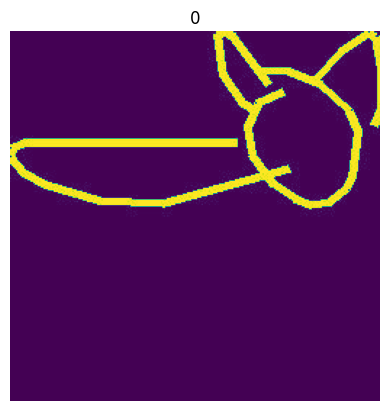

In [331]:
plt.axis('off')
plt.title(y[0])
plt.imshow(X[0])

In [332]:
from sklearn.utils import shuffle

In [333]:
X, y = shuffle(X, y)

In [334]:
def split_to_train_test(data, train_ratio=0.8, test_ratio=0.1):
    SIZE = len(data)
    train = data[:int(SIZE * train_ratio)]
    rest = data[int(SIZE * train_ratio):]
    test = rest[:int(SIZE * test_ratio)]
    val = rest[int(SIZE * test_ratio):]

    print(len(train), len(test), len(val))

    return train, test, val

In [335]:
train_X, test_X, val_X = split_to_train_test(X)

7423 927 929


In [336]:
train_y, test_y, val_y = split_to_train_test(y)


7423 927 929


In [337]:
train_X = np.expand_dims(train_X, axis=3)
test_X = np.expand_dims(test_X, axis=3)
val_X = np.expand_dims(val_X, axis=3)
train_X.shape

(7423, 255, 255, 1)

In [338]:
IMG_SIZE = 28
train_X = np.array(list(map(lambda x: tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), train_X)))
val_X = np.array(list(map(lambda x: tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), val_X)))
test_X = np.array(list(map(lambda x: tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), test_X)))

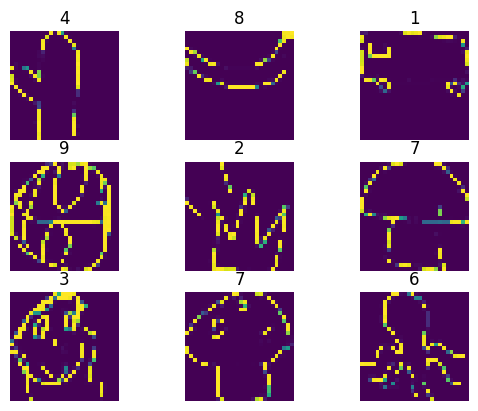

In [339]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(int(train_y[i]))
    plt.imshow(train_X[i]);

In [340]:
import pandas as pd

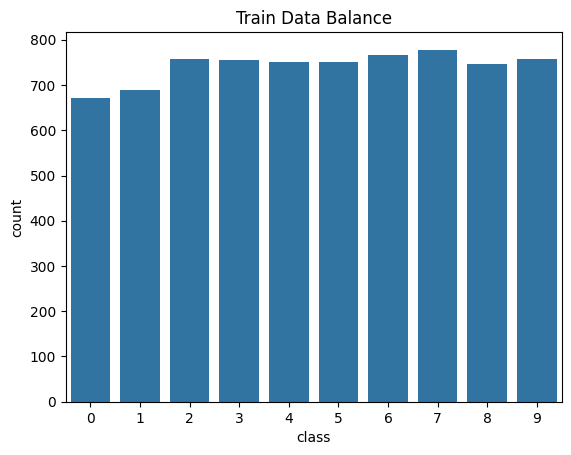

In [341]:
plt.title('Train Data Balance')
classes_df = pd.DataFrame({'class': train_y})
sns.countplot(data=classes_df, x='class');

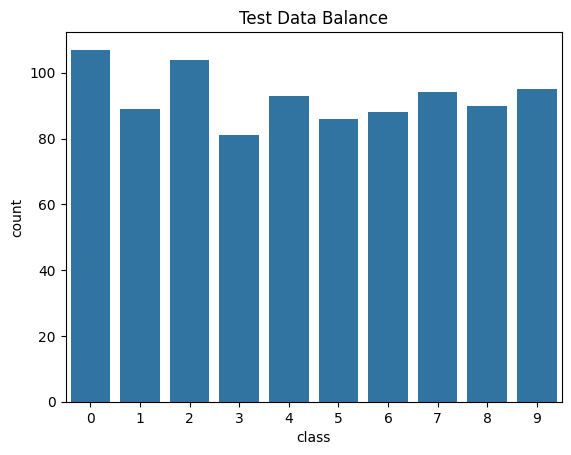

In [342]:
plt.title('Test Data Balance')
classes_df = pd.DataFrame({'class': test_y})
sns.countplot(data=classes_df, x='class');

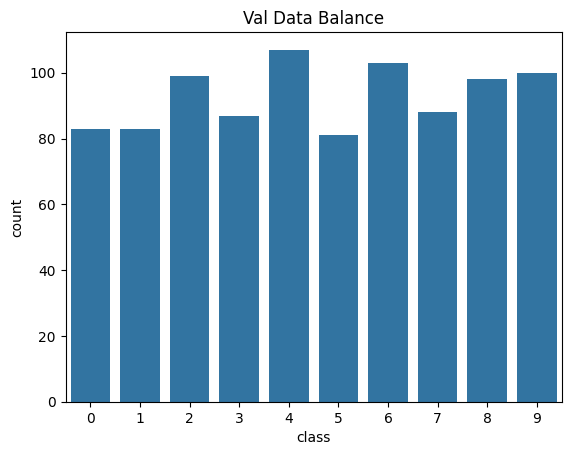

In [343]:
plt.title('Val Data Balance')
classes_df = pd.DataFrame({'class': val_y})
sns.countplot(data=classes_df, x='class');

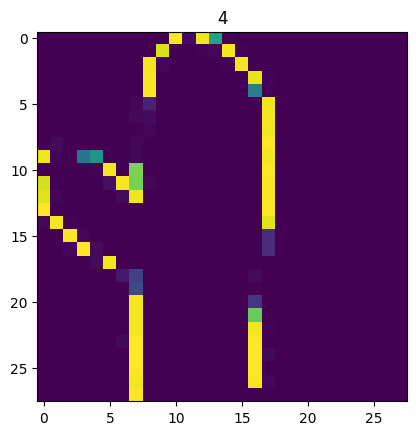

In [344]:
plt.title(train_y[0])
plt.imshow(train_X[0])

# **MODEL**

In [345]:
"""
If your Y
is are one-hot encoded, use categorical_crossentropy.
Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Y
is are integers, use sparse_categorical_crossentropy.
Examples for above 3-class classification problem: [1] , [2], [3]
"""

'\nIf your Y\nis are one-hot encoded, use categorical_crossentropy.\nExamples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]\n\nBut if your Y\nis are integers, use sparse_categorical_crossentropy.\nExamples for above 3-class classification problem: [1] , [2], [3]\n'

In [346]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [347]:
input_shape = train_X.shape[1:]
input_shape

(28, 28, 1)

In [348]:
from data_loader import categories

In [349]:
num_classes = len(categories)
num_classes

10

In [350]:
data_augmentation = tf.keras.Sequential([
  layers.InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.5, 0.2)
])

In [351]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.Conv2D(30, (5, 5), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(15, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [352]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [353]:
from tensorflow.keras import callbacks

In [354]:
cbs = [
    callbacks.ModelCheckpoint(
        'model_saves',
        save_weights_only=True
    ),
    callbacks.EarlyStopping(
        patience=3,
        min_delta=0.001
    )
]

In [355]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=30,
    batch_size=128,
    verbose=2,
    callbacks=cbs,
    shuffle=True
)

Epoch 1/30
58/58 - 2s - loss: 1.1165 - accuracy: 0.6411 - val_loss: 3.9378 - val_accuracy: 0.1076 - 2s/epoch - 30ms/step
Epoch 2/30
58/58 - 1s - loss: 0.5644 - accuracy: 0.8294 - val_loss: 4.0239 - val_accuracy: 0.1141 - 815ms/epoch - 14ms/step
Epoch 3/30
58/58 - 1s - loss: 0.4134 - accuracy: 0.8707 - val_loss: 2.3036 - val_accuracy: 0.2734 - 824ms/epoch - 14ms/step
Epoch 4/30
58/58 - 1s - loss: 0.3302 - accuracy: 0.9008 - val_loss: 1.1460 - val_accuracy: 0.5953 - 824ms/epoch - 14ms/step
Epoch 5/30
58/58 - 1s - loss: 0.2778 - accuracy: 0.9146 - val_loss: 0.9741 - val_accuracy: 0.6609 - 1s/epoch - 19ms/step
Epoch 6/30
58/58 - 1s - loss: 0.2558 - accuracy: 0.9220 - val_loss: 0.6507 - val_accuracy: 0.7966 - 842ms/epoch - 15ms/step
Epoch 7/30
58/58 - 1s - loss: 0.2318 - accuracy: 0.9268 - val_loss: 0.4473 - val_accuracy: 0.8687 - 843ms/epoch - 15ms/step
Epoch 8/30
58/58 - 1s - loss: 0.1870 - accuracy: 0.9410 - val_loss: 0.4896 - val_accuracy: 0.8784 - 806ms/epoch - 14ms/step
Epoch 9/30
58/

In [356]:
model.evaluate(test_X, test_y)

29/29 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.8436


[0.8481279015541077, 0.8435814380645752]

In [357]:
pred = model.predict(test_X)

29/29 [==============================] - 0s 1ms/step


In [358]:
np.argmax(pred[0])

2

In [359]:
test_y[0]

2

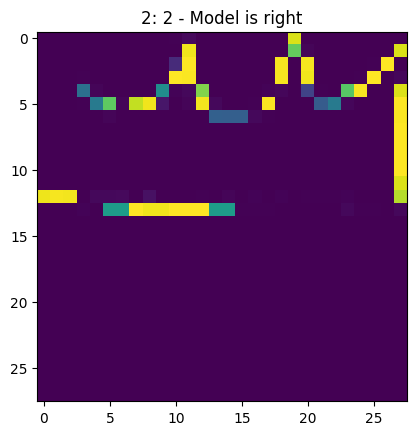

In [360]:
plt.title(f'{np.argmax(pred[0])}: {test_y[0]} - Model is {"right" if np.argmax(pred[0]) == test_y[0] else "wrong"}')
plt.imshow(test_X[0])

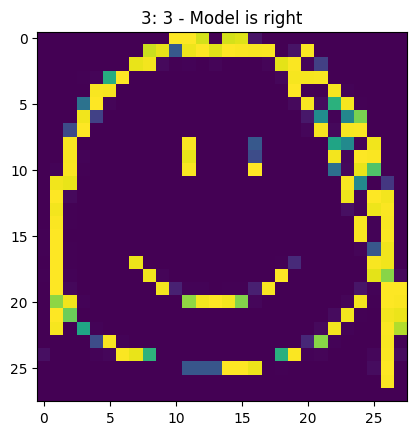

In [361]:
plt.title(f'{np.argmax(pred[1])}: {test_y[1]} - Model is {"right" if np.argmax(pred[1]) == test_y[1] else "wrong"}')
plt.imshow(test_X[1])

In [362]:
def create_model():
    model = Sequential([
        layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 1)),
        layers.Conv2D(30, (5, 5), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),
        layers.Conv2D(15, (3, 3), activation='relu'),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss=SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [363]:
model1 = create_model()
model1.load_weights('model_saves')

In [364]:
model1.evaluate(test_X, test_y)

29/29 [==============================] - 0s 2ms/step - loss: 0.8481 - accuracy: 0.8436


[0.8481279015541077, 0.8435814380645752]

**Sad you can't see my happiness...** <br>
**But now I'm moving one of the stickers to DONE on my kanban board**

In [365]:
import os
from PIL import Image

In [366]:
def user_data(image_path):
    X = []
    img = np.asarray(Image.open(image_path).convert('L'))
    img = np.expand_dims(img, axis=2)
    print(img.shape)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    print(img.shape)
    X.append(img)
    plt.imshow(img)
    return X

(529, 570, 1)
(28, 28, 1)


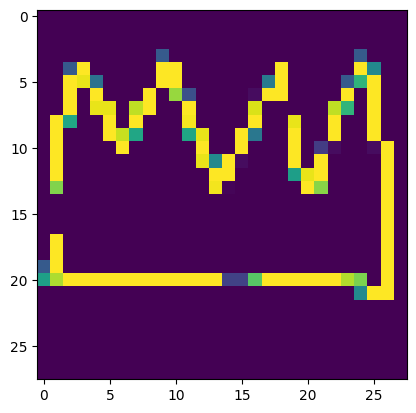

In [367]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/Crown.png')

In [368]:
user_img_mr = np.expand_dims(user_img_mr, axis=3)

In [369]:
pred = model1.predict(user_img_mr)

1/1 [==============================] - 0s 70ms/step


In [370]:
user_img_mr[0].shape

(28, 28, 1, 1)

In [371]:
enc = {}
for i in range(len(categories)):
    enc[i] = categories[i]

In [372]:
result = user_img_mr[0, :, :, 0]
result.shape

(28, 28, 1)

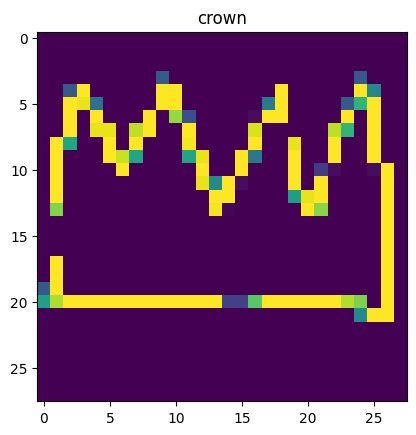

In [373]:
plt.title(enc[np.argmax(pred)])
plt.imshow(result);

(256, 266, 1)
(28, 28, 1)
1/1 [==============================] - 0s 18ms/step


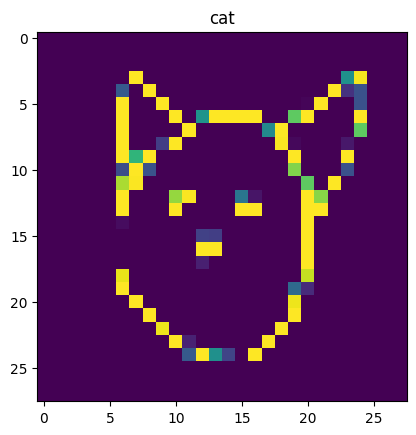

In [379]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/Cat.png')
user_img_mr = np.expand_dims(user_img_mr, axis=3)
pred = model1.predict(user_img_mr)
result = user_img_mr[0, :, :, 0]
result.shape
plt.title(enc[np.argmax(pred)])
plt.imshow(result);

(193, 197, 1)
(28, 28, 1)
1/1 [==============================] - 0s 16ms/step


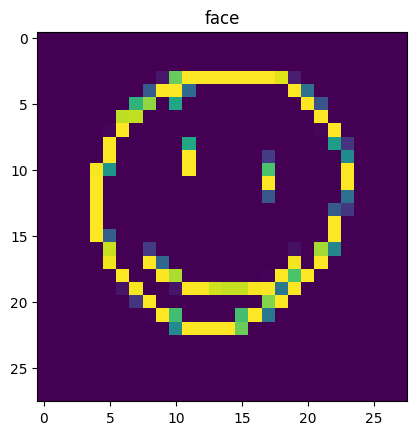

In [380]:
user_img_mr = user_data('E:/ConvMoNET/TestImages/Face.png')
user_img_mr = np.expand_dims(user_img_mr, axis=3)
pred = model1.predict(user_img_mr)
result = user_img_mr[0, :, :, 0]
result.shape
plt.title(enc[np.argmax(pred)])
plt.imshow(result);